# Instructions {-}

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification {-}

### Your Information {-}

Your Last Name:
Ania

Your First Name:
Latrofa

### Group Members (list any classmates you worked with on this problem set) {-}

Your Group Members:

In [2]:
# Loading initial packages
import pandas as pd
import numpy as np
from plotnine import *
from IPython.display import Image

# Problem 1 - Elections in Iran[^1] {-}

[^1]: Problem 1 was originally designed in collaboration with Dan Levy.

On June 12, 2009, Iran held presidential elections between the incumbent Mahmoud Ahmadinejad and challenger Mir-Houssein Mousavi. The official results indicated that Ahmadinejad won with 62% of the vote. There were several allegations of fraud. One of the key arguments behind one of the allegations was that the government had made up vote counts and that this could be detected statistically. The underlying notion is that when people make up numbers they have systematic biases and that the resulting numbers exhibit a pattern. In the case of the Iranian elections, analysts looked at several patterns, but this problem set will examine the patterns in the __last digit__ of the official vote counts (i.e. if the vote count for a province was 5,678, the last digit was 8). They looked at the vote counts for all `29` provinces in Iran across 4 candidates for a total of `116` observations and tabulated a frequency distribution of the last digit. The results are below. If no fraud had occurred, one would expect to see no systematic pattern in the distribution of the last digit. In other words, one would expect the last digits to follow a discrete uniform distribution (_i.e._ 10% frequency for each of the digits). 

As presented below, the actual results seem to be different from this. While this difference could potentially be due to sampling fluctuations, the analysts tried to assess statistically whether the deviations were large enough to warrant suspicion of fraud. In this problem set question, we will focus on the last digit 7, which had an observed relative frequency of `17.24%`.

| Last Digit of Vote Count | Number of Provinces | Observed Fraction |
| ------------------------ | ------------------- | ----------------- |
| 1                        | 11                  | 9.48%             |
| 2                        | 8                   | 6.90%             |
| 3                        | 9                   | 7.76%             |
| 4                        | 10                  | 8.62%             |
| 5                        | 5                   | 4.31%             |
| 6                        | 14                  | 12.07%            |
| $\color{red}{\text{7}}$  | $\color{red}{\text{20}}$ | $\color{red}{\text{17.24\%}}$    |
| 8                        | 17                  | 14.66%            |
| 9                        | 13                  | 11.21%            |
| 0                        | 9                   | 7.76%             |
| Total                    | 116                 | 100%              |

## 1-A: Hypothesis Testing {-}

Test the hypothesis that the proportion of vote counts that end in `7` is equal to `10%`. Conduct the test in the following way:

1. State the null and alternative hypotheses
2. Calculate the observed difference in proportion (the observed proportion of `7` digits vs the theorized value under the null hypothesis) 
3. Calculate the standard deviation of the sampling distribution under the null (Hint, use the formula provided in the class handouts)
4. Calculate the relevant test statistic
5. Calculate and report the p-value associated with this test statistic (conduct a two-sided test)

Please indicate at the end whether you would reject the null hypothesis. Consider the true population proportion to be $p = 0.1$.

Hint: to calculate the associated p-value, you may use the `norm.cdf()` function from the `scipy.stats` library which was introduced in Problem Set 3. You may load this function with the following code:

```python
from scipy.stats import norm
```

_State the null and alternative hypotheses:_

In [3]:
from scipy.stats import norm

Null and alternative hypotheses:

$ H_0: p_0=0.1 $

$ H_1: p_0 \ne 0.1 $

In [4]:
# Calculate the observed difference in proportion
p_obs = 0.1724
p0 = 0.10
diff_proportion = p_obs - p0
print(f"The observed difference in proportion is: {diff_proportion:.4f}")

The observed difference in proportion is: 0.0724


In [5]:
# Calculate the standard deviation of the sampling distribution under the null

n = 20
sampling_std = np.sqrt(p0*(1-p0)/n)
print(f"The standard deviation of the sampling distribution under the null is: {sampling_std:.3f}")

The standard deviation of the sampling distribution under the null is: 0.067


In [6]:
# Calculate the test statistic

z = (p_obs - p0)/sampling_std

print(f"The test statistic is z = {z:.4f}")

The test statistic is z = 1.0793


In [ ]:
# Package and initial parameters
from scipy.stats import norm
p_hat = 0.1724
p = 0.1
n = 116
# Calculate the observed difference in proportion
diff = p_hat - p
# Calculate the standard deviation of the sampling distribution under the null
se_samp = np.sqrt(p*(1-p)/n)
print(se_samp)
0.02785430072655778
# Calculate the test statistic
z_stat = diff/se_samp
print(z_stat)
2.5992395469102534
# Calculate and report the p-value from a two-sided test
2*norm.cdf(-z_stat)

In [7]:
# Calculate and report the p-value from a two-sided test

p_value = 2*norm.cdf(-abs(z))

print(f"The p-value is = {p_value:.4f}")

The p-value is = 0.2805


In [11]:
import scipy as sp

In [12]:
sp.stats.ttest_ind(z)

TypeError: ttest_ind() missing 1 required positional argument: 'b'

## 1-B: Reporting Your Conclusion {-}

Would you conclude there was fraud in the Iranian 2009 Elections? Explain briefly [1 short paragraph] in language an intelligent (but non-technical) policymaker could understand. Please type your answer in a cell below, and copy and paste into this brief [survey](https://moodle.lse.ac.uk/mod/questionnaire/view.php?id=1809589):

_Your paragraph here:_

Since our z-statistic is `1.079` and the p-value is `0.28`, we fail to reject the null hypothesis (H0) at the `1%`,`5%`, and `10%` significance levels. This means that the difference between the observed proportion of vote counts ending in the digit `7` and the theorized value under the null hypothesis is not statistically significant.
The data does not provide strong evidence to suggest any irregularities or fraud in the 2009 Iranian election.

# Problem 2 - Statistical Power {-}

## 2-A: Assessing Statistical Power in Schooling Intervention {-}

The table below shows minimum detectable effects for a program aimed at increasing school attendance.

| Treatment Group Sample Size | Control Group Sample Size | Minimum Detectable Difference (MDE)\* |
| --------------------------- | ------------------------- | ------------------------------------- |
| 1,200                       | 1,200                     | 3.4                                   |
| 1,600                       | 1,600                     | 2.95                                  |
| 2,200                       | 2,200                     | 2.51                                  |

*: Expressed in terms of percentage points. Assumptions: $\alpha=0.05$, $\beta=0.20$, two-tailed test.

Suppose you were willing to decrease the desired statistical power $(1- \beta)$ from 80% to 70%. Keeping everything else (including α and sample size) constant, what would happen to the MDEs reported in the table?

1. They would increase
2. They would stay the same
3. They would decrease
4. Not enough information
5. I don’t know

Identify your answer from the options above and briefly justify your choice here:

_Your answer and justification here:_


My answer is #3: _They would decrease_

Decreasing the desired statistical power from `80%` to `70%` reduces the z-score associated with the Type II error, from around `0.84` to `0.524`. Because the Minimum Detectable Effect (MDE) depends positively on this z-score, the reduction in z_beta results in a lower MDE.

Look at the calculations below for proof.

In [95]:
β1 = 0.2
power_β1 = 1- β
power_β2 = .7
z_β1 = norm.ppf(power_β1)
z_β2 = norm.ppf(power_β2)
print("Initial z of β =", f"{z_β1:.4f}")
print("New z of β =", f"{z_β2:.4f}")

Initial z of β = 0.8416
New z of β = 0.5244


## 2-B: Power Comparative Statics {-}

Suppose the power of a study design is 80%. Other things being constant, what would happen to the statistical power of the design if we increased the level of significance ($\alpha$) from 5% to 10%?

- It increases
- It stays the same
- It decreases
- Not enough information
- I don’t know

Please explain the rationale for your answer above

_Your answer and rational here:_

My answer is #3: _They would decrease_

By increasing α, we are accepting more Type I errors, and it becomes easier to reject the null hypothesis. This means that a smaller true effect would be needed to achieve statistical significance, so the MDE goes down.

Look at the calculations below for proof.

In [96]:
α1 = 0.05
α2 = 0.10
z_α1 = norm.ppf(1-α1/2)
z_α2 = norm.ppf(1-α2/2)
print("Initial z of α =", f"{z_α1:.2f}")
print("New z of α =", f"{z_α2:.2f}")

Initial z of α = 1.96
New z of α = 1.64


# Problem 3 - Labour Market Outcomes in South Africa {-}

The question asks you to explore the issue of ethnic differences in labor market outcomes in post-apartheid South Africa. In this problem set question, you will empirically estimate these differences. In particular, you will examine how employment levels and earnings vary by ethnic group, and optionally by education and gender.

This problem set question will allow you to continue to develop your python skills by conducting statistical analyses on a data set derived from the South Africa’s Post Apartheid Labour Market Series (PALMS).[^2] For this analysis, we will focus on sample data collected in 2017. Note that the observations in the data represent __random samples__, not the population. A partially cleaned copy of the data set has been provided in the `palms_clean.csv` file. 

This data set contains the following variables:

1. `Year` – survey year (restricted to 2017 for this problem set)
2. `Popgroup` – respondent population group. This is a numeric variable corresponding to the following categories:
    * `1` African/Black
    * `2` Coloured
    * `3` Indian/Asian
    * `4` White
    * `5` Other
    * `9` Unspecified
3. `Gender`- respondent gender, which the data collection agency only divided into Male / Female. The numeric coding of this variable corresponds to:
    * `1` Male
    * `2` Female
    * `9` Unspecified
4. `Age` - respondent age
5. `Empstat1` - employment status
    * `1` Employed
    * `2` Unemployed
    * `0` Not economically active
6. `yrseduc` - respondent years of education
7. `imputed_real` - real monthly income (imputed from other measures in the larger data set)

[^2]: You may read more about the methodology and the data set [here](https://brill.com/view/journals/rdj/5/1/article-p39_39.xml?language=en)

## 3-0: Initial Exploration {-}

Read in the data set and examine it. How is the data stored? What are the `dtypes` associated with the various columns, and are they in an appropriate format for us to work with? Are there any missing data points, and if so are they concentrated in any of the variables?

In [4]:
# Read in the data and conduct your initial exploration
palms = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W4 palms_clean.csv')

In [98]:
palms.dtypes

year              int64
popgroup          int64
gender            int64
age               int64
empstat1          int64
yrseduc         float64
imputed_real    float64
dtype: object

In [99]:
palms.head(20)

,year,popgroup,gender,age,empstat1,yrseduc,imputed_real
0,2017,2,1,70,0,4.0,NaN
1,2017,1,1,26,1,6.0,3104.155518
2,2017,1,2,20,1,6.0,3326.246338
3,2017,2,1,25,1,8.0,3104.155518
4,2017,2,2,21,1,11.0,3991.495605
5,2017,2,1,99,0,12.0,NaN
6,2017,2,2,88,0,8.0,NaN
7,2017,2,1,53,1,17.0,NaN
8,2017,2,2,51,1,16.0,30499.121090
9,2017,2,1,36,1,12.0,16503.298830


In [100]:
palms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191020 entries, 0 to 191019
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          191020 non-null  int64  
 1   popgroup      191020 non-null  int64  
 2   gender        191020 non-null  int64  
 3   age           191020 non-null  int64  
 4   empstat1      191020 non-null  int64  
 5   yrseduc       189126 non-null  float64
 6   imputed_real  61788 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 10.2 MB


In [101]:
palms.describe()

,year,popgroup,gender,age,empstat1,yrseduc,imputed_real
count,191020.0,191020.000000,191020.000000,191020.000000,191020.000000,189126.000000,6.178800e+04
mean,2017.0,1.357811,1.539242,38.871977,0.681656,9.581380,8.129590e+03
std,0.0,0.839875,0.498459,17.316994,0.716886,3.667434,1.998999e+04
min,2017.0,1.000000,1.000000,15.000000,0.000000,0.000000,2.000000e+01
25%,2017.0,1.000000,1.000000,25.000000,0.000000,8.000000,1.831487e+03
50%,2017.0,1.000000,2.000000,36.000000,1.000000,11.000000,3.500000e+03
75%,2017.0,1.000000,2.000000,51.000000,1.000000,12.000000,8.069364e+03
max,2017.0,4.000000,2.000000,115.000000,2.000000,17.000000,1.500000e+06


In [102]:
palms.shape

(191020, 7)

## 3-A: Additional Data Cleaning {-}

First, we need to clean the data set to make it easier to analyze the data. After loading in the data, make the following changes:

### Converting Numeric Variables to Categorical {-}

A __categorical__ data type is used to store information about a group an observation belongs to. We will typically need to ensure this grouping information is correctly stored as categories before proceeding. For example, the `popgroup` variable in the data set is an integer value, but that integer is only used to store information about group designation. It would be a mistake to try to do any maths on this number (_e.g._ taking the mean). You can read the documentation for how pandas works with categorical variables [here](https://pandas.pydata.org/docs/user_guide/categorical.html#).


1. Recode the following variables as a categorical type with appropriate levels based on the description above: `popgroup`, `gender`, `empstat1`


To help get you started, the following code will create a new variable `sex` which converts the provided `gender` variable to a categorical type with categories `Male`, `Female` and `Unspecified`.

```python
palms['sex'] = palms['gender'].astype('category').cat.rename_categories(
    # Passing a dictionary mapping the changes we wish to make
    {1: 'Male', # Mapping from numeric 1 to category level 'Male'
     2: 'Female', # Mapping from numeric 2 to category level 'Female'
     9: 'Unspecified'} # Mapping from numeric 9 to category level 'Unspecified'
)
# Dropping the old variable
palms.drop('gender', inplace=True, axis=1)
```
You may copy and run this code, but you should plan on modifying the code so that the `popgroup` and `empstat1` variables are saved as a categorical type with appropriate levels based on the earlier variable description.

In [5]:
# Recoding and renaming the gender variable:
palms['sex'] = palms['gender'].astype('category').cat.rename_categories(
    # Passing a dictionary mapping the changes we wish to make
    {1: 'Male', # Mapping from numeric 1 to category level 'Male'
     2: 'Female', # Mapping from numeric 2 to category level 'Female'
     9: 'Unspecified'} # Mapping from numeric 9 to category level 'Unspecified'
)
# Dropping the old variable
palms.drop('gender', inplace=True, axis=1)

In [6]:
# Adjusting the popgroup variable
palms['population group'] = palms['popgroup'].astype('category').cat.rename_categories(
    {1: 'African/Black',
     2: 'Coloured',
     3: 'Indian/Asian',
     4: 'White',
     5: 'Other',
     9: 'Unspecified'}
)
palms.drop('popgroup', inplace=True, axis=1)

# Adjusting the empstat variable
palms['employment status'] = palms['empstat1'].astype('category').cat.rename_categories(
    {1: 'Employed',
     2: 'Unemployed',
     0: 'Not economically active'}
)
palms.drop('empstat1', inplace=True, axis=1)

### Creating Our Own Category Levels {-}

Use the `yrseduc` variable to create a new variable which assigns each value to one of the following education levels: 

* `Primary` - less than 6 years of education
* `Lower Secondary` - between 6 and 8 years of education
* `Upper Secondary` - between 9 and 12 years of education
* `Bachelor or Above` - greater than 12 years of education

Hint: you can first create a new column in your data frame with just the text descriptions as strings (Primary, Lower Secondary, etc.) and then convert that column to a categorical data type. 

Further hint: this categorical variable has a natural hierarchy or ordering between categories representing more years of education. The `.cat.reorder_categories()` method included in the previously linked pandas documentation can redefine the ordering (which may default to alphabetical). 

In [7]:
palms['education_level'] = pd.cut(
    palms['yrseduc'],
    bins=[-np.inf, 6, 9, 13, np.inf],
    labels=['Primary', 'Lower Secondary', 'Upper Secondary', 'Bachelor or Above'],
    right=False,
    ordered=True
)

## 3-B: Comparing Employment Rates {-}

Compare the 4 main ethnic groups in South Africa according to their employment rate in 2017. Note, for purposes of this problem set, you can calculate the employment rate as the percentage of respondents in an ethnic group category in the survey who are classified as employed by the ‘empstat1’ variable divided by the total number of respondents in that ethnic group category.

Report the mean employment rate for each major ethnic group.

In [8]:
# Calculate employment rates by ethnic group

# For African/Black:
ab_employed = palms[palms['population group'] == 'African/Black']['employment status'].value_counts(normalize=True)['Employed']

# For Coloured
c_employed = palms[palms['population group'] == 'Coloured']['employment status'].value_counts(normalize=True)['Employed']

# For Indian/Asian
ia_employed = palms[palms['population group'] == 'Indian/Asian']['employment status'].value_counts(normalize=True)['Employed']

# For White
w_employed = palms[palms['population group'] == 'White']['employment status'].value_counts(normalize=True)['Employed']

print(f"""The following are the employment rates for the 4 major ethnic groups in South Africa:
      - African/Black = {ab_employed*100:.2f}%,
      - Coloured = {c_employed*100:.2f}%, 
      - Indian/Asian = {ia_employed*100:.2f}%, 
      - White = {w_employed*100:.2f}%""")

The following are the employment rates for the 4 major ethnic groups in South Africa:
      - African/Black = 36.47%,
      - Coloured = 42.68%, 
      - Indian/Asian = 46.61%, 
      - White = 52.75%


## 3-C: Visualizing Education and Employment Rates {-}

The following plot appeared in a recent report from the Harvard CID's Growth Lab examining this data set (but from a different year). In this plot they delineate by different measures of employment types (which are not readily available in our data set). 

Your task in this problem is to instead display information on different __levels of education__, which we do have. Building on your calculation from problem 3-B, calculate the employment rate for each category of `popgroup` within each education category we defined above and create a visualization to display this information. Make sure your visualization is well labeled with appropriate axes names. You may use the below visualization as a template, but feel free to think of ways you could improve upon the display.

You may find it helpful to refer back to any of the visualization galleries we have seen in the class so far. Another possible example gallery is from [UNHCR](https://dataviz.unhcr.org/chart_gallery/), which provides their chart gallery with guidance as well as sample code in python (and other languages) which is available via a link below the individual charts. The _Financial Times_ also produces a [Visual Vocabulary Guide](https://ft-interactive.github.io/visual-vocabulary/) that can recommend different plots depending on what you wish to communicate.

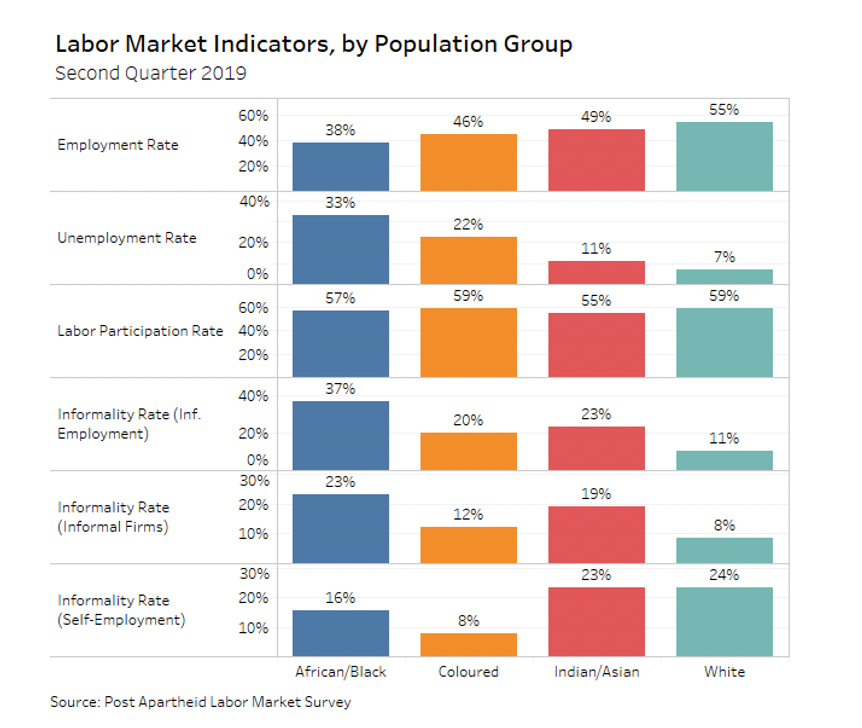

In [122]:
Image('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/cid_graphic.png')

In [9]:
import matplotlib.pyplot as plt

In [21]:
education_levels = ['Primary', 'Lower Secondary', 'Upper Secondary', 'Bachelor or Above']
pop_groups = ['African/Black', 'Coloured', 'Indian/Asian', 'White']

results = {}

for pop in pop_groups:
    results[pop] = []
    for edu in education_levels:
        subset = palms[(palms['population group'] == pop) & (palms['education_level'] == edu)]
        emp_rate = (subset['employment status'] == 'Employed').mean()
        results[pop].append(emp_rate)

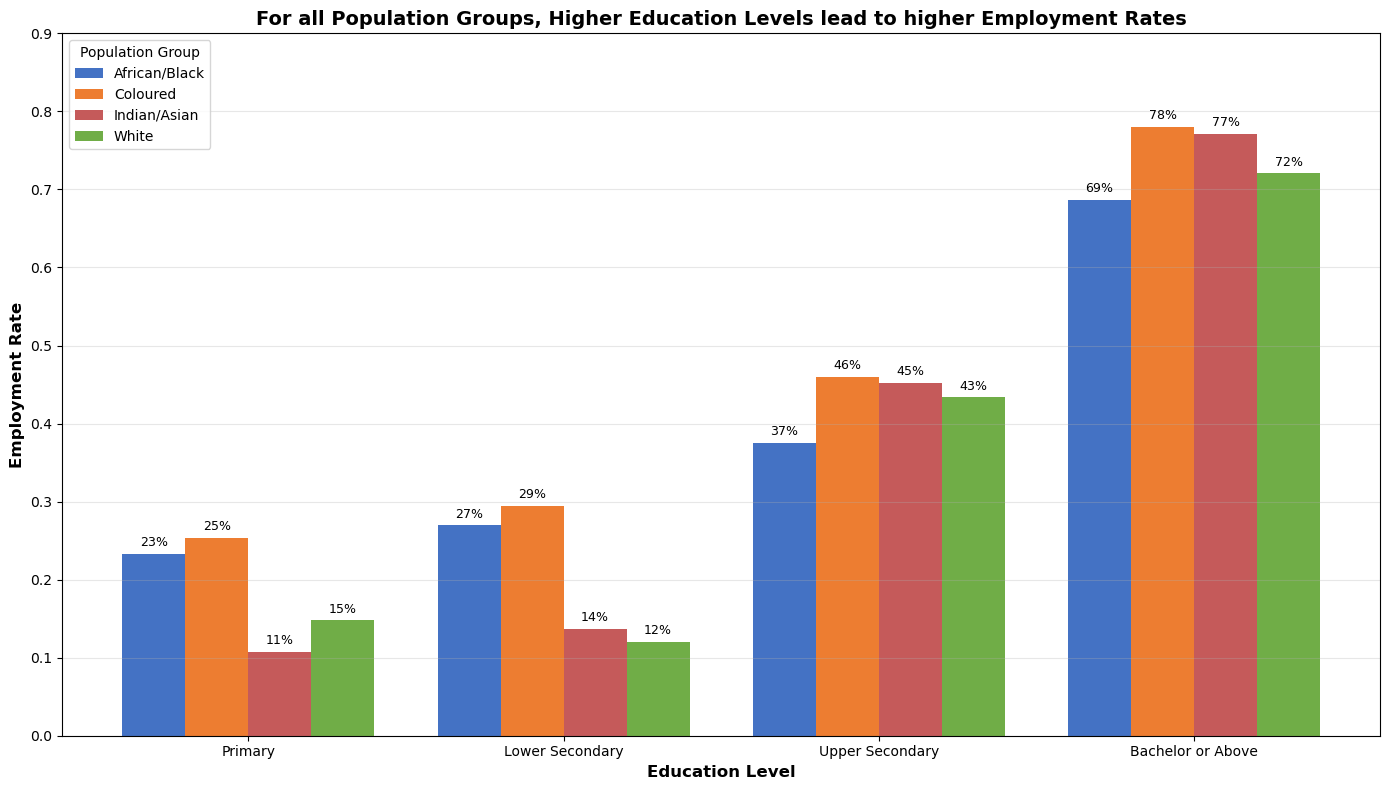

In [11]:
education_levels = ['Primary', 'Lower Secondary', 'Upper Secondary', 'Bachelor or Above']
pop_groups = ['African/Black', 'Coloured', 'Indian/Asian', 'White']

colors = ['#4472C4', '#ED7D31', '#C55A5A', '#70AD47']

x = np.arange(len(education_levels))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

for i, pop in enumerate(pop_groups):
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, results[pop], width, label=pop, color=colors[i])
    
    for j, v in enumerate(results[pop]):
        ax.text(j + offset, v + 0.01, f'{v:.0%}', ha='center', fontsize=9)

ax.set_xlabel('Education Level', fontsize=12, fontweight='bold')
ax.set_ylabel('Employment Rate', fontsize=12, fontweight='bold')
ax.set_title('For all Population Groups, Higher Education Levels lead to higher Employment Rates', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(education_levels)
ax.set_ylim(0, 0.9)
ax.legend(title='Population Group', loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("W4 Education and Employment Rates", dpi=300) 
plt.show()

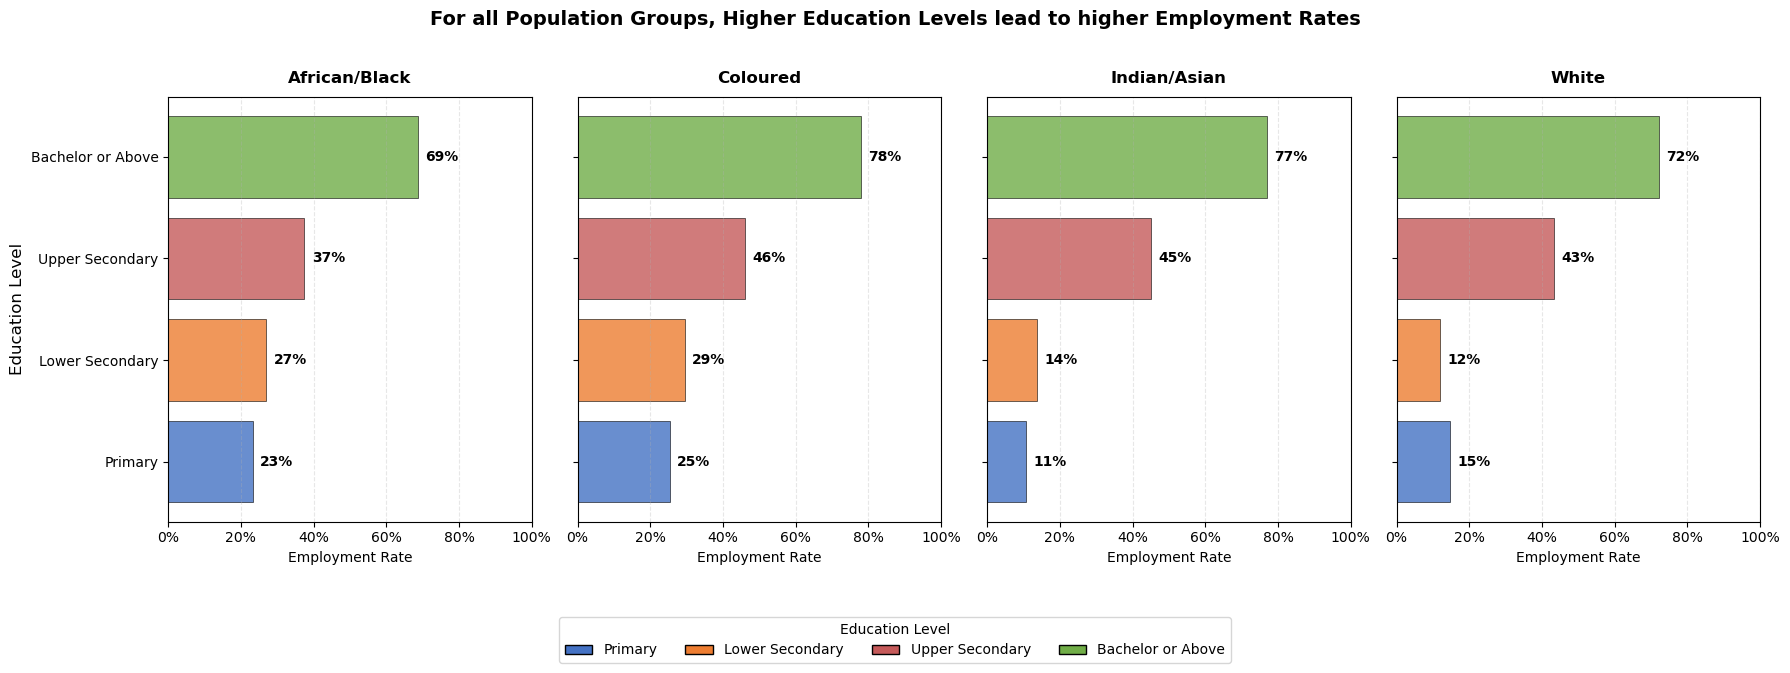

In [28]:
education_levels = ['Primary', 'Lower Secondary', 'Upper Secondary', 'Bachelor or Above']
pop_groups = ['African/Black', 'Coloured', 'Indian/Asian', 'White']

colors = ['#4472C4', '#ED7D31', '#C55A5A', '#70AD47']

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, pop in enumerate(pop_groups):
    ax = axes[i]
    
    bars = ax.barh(education_levels, results[pop], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    for j, v in enumerate(results[pop]):
        ax.text(v + 0.02, j, f'{v:.0%}', va='center', fontsize=10, fontweight='bold')
    
    ax.set_title(pop, fontsize=12, fontweight='bold', pad=10)
    
    ax.set_xlim(0, 1.0)
    ax.set_xticks(np.arange(0, 1.1, 0.2))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    ax.set_xlabel('Employment Rate', fontsize=10)

axes[0].set_ylabel('Education Level', fontsize=12)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=education_levels[i]) 
                   for i in range(len(education_levels))]
fig.legend(handles=legend_elements, title='Education Level', 
           loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=4, fontsize=10)

fig.suptitle('For all Population Groups, Higher Education Levels lead to higher Employment Rates', 
             fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])

plt.savefig("W4 Education and Employment Rates 2", dpi=300, bbox_inches='tight') 
plt.show()

## 3-D: Consistency of Your Results {-}

In Problem 3-B you calculated the unemployment rate for each of the four main ethnic groups in the data set. Your calculation likely found that the employment rate was highest amongst `White` respondents. Examining the data for your plot in 3-C and looking across all levels of education, you should also find the employment rate for respondents in the `Coloured` ethnic group is higher than those in the `White` ethnic group in __each__ education category.

Is this possible? If it is impossible briefly explain why. If it is possible, explore the dataset and explain the key features of the data that would produce this result. 

_Your explanation here:_

As noted, the employment rate was the highest among White respondents, nonetheless the graph clearly shows that the employment rate for the Coloured ethnic group is higher in each education category. This apparent contradiction arises because White respondents are disproportionately concentrated in higher education categories, particularly "Bachelor or Above," where employment rates are substantially higher for all groups. When we calculate the overall employment rate without controlling for education, White respondents' concentration in high-employment categories pulls their overall rate upward, yet Coloured respondents consistently outperform White respondents at the same education level.

## 3-E: Testing the Difference in Means {-}

This problem asks you to formally test whether there is a statistically significant difference in the mean values for the `imputed_real` variable, which measures real monthly income. First, report the average value for the `imputed_real` variable for each `popgroup` category in the dataset.

In [151]:
# Your average calculation here
mean_income_by_group = palms.groupby('population group')['imputed_real'].mean()
print(f"""Average real monthly income by population group:
      {mean_income_by_group}""")

Average real monthly income by population group:
      population group
African/Black     6700.951765
Coloured          7286.067315
Indian/Asian     15280.590492
White            20287.354285
Name: imputed_real, dtype: float64


/var/folders/r5/c67p3rz927ddb6mdh60hgcl80000gn/T/ipykernel_51284/2762322986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Your above calculation should reveal large (in magnitude) differences between many of the `popgroup` categories, but the means for the `imputed_real` variable are relatively close for respondents in the `African/Black` and `Coloured` categories. This question guides you through how to conduct a t-test comparing these means.

### First, explain why it would be helpful to conduct hypothesis testing to assess our earlier findings about differences in real income. [2-3 sentences] {-}

_Your explanation here:_

It would be helpful to conduct hypothesis testing regarding differences in real income due to the fact that we are basing our analyses on random sampling, which might not provide optimal representation of the true population differences. Therefore, we need to determine whether the income disparities are statistically meaningful or simply due to sampling error.

### Conducting the Test {-}

Next, load in functionality from the `scipy` library with the following command.

```python
from scipy import stats
```
The stats object contains a method `ttest_ind()` which will conduct a t-test for a difference in means from independent samples. This test expects as arguments arrays with the data for the individual groups. The documentation for this test is available [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

After reading the documentation, conduct a t-test comparing the mean `imputed_real` value for respondents in the `Coloured` and `African/Black` categories. Report the associated test statistic and p-value from your test.

Note, you may need to drop missing values before running your test.

In [152]:
from scipy import stats

In [157]:
# Your code here
ab_income_data = palms[palms['population group'] == 'African/Black']['imputed_real'].dropna()
c_income_data = palms[palms['population group'] == 'Coloured']['imputed_real'].dropna()

t_stat = stats.ttest_ind(ab_income_data, c_income_data)
print(f"The resulting t-statistic is: {t_stat.statistic:.3f}")
print(f"The resulting p-value is: {t_stat.pvalue:.3f}")

The resulting t-statistic is: -2.467
The resulting p-value is: 0.014


## 3-F: Explaining the p-value {-}

Explain what the p-value in this test means. Be precise. You may use technical language.

_Your explanation here:_

The p-value obtained, of 0.014, means that if there were no true difference in income between these groups (the null hypothesis), the probability of observing a difference as large as (or larger than) what we found would be only 1.4%, due to random chance alone.
We can reject the null hypothesis at the 5% significance level, and we conclude that there is statistically significant evidence of a real income difference between the two groups.

Additionally, the negative t-statistic confirms that the African/Black group earns less on average than the Coloured group.

## 3-G: Explaining to a non-technical audience {-}

Express the conclusions of the test in a language that a policymaker (who is intelligent but not well-versed in statistics) can understand.

_Your explanation here_

Our analysis leads to the conclusion that, first, the Coloured group tends to earn more on average than the African/Black group. Second, we statistically demonstrated that there is significant evidence of a real income gap between the two groups.

The probability of observing a difference this large (or larger) if there were truly no income gap would be only 1.4%, which is below our 5% significance threshold. This provides strong evidence that the income difference is real and not due to random sampling variation.

# Problem 4 - Avery vs. Blake {-}

In __Problem Set 1__ I gave you information on global economic measurements at a country level from the WDI dataset. This dataset contained information on `region` and `income_group` for various countries. The literature on economic development often examines questions of _convergence_, which asks whether lower income countries will grow at a faster rate than higher income countries. If this were true, then we would expect global (cross-country) inequality to decline over time and for countries to "catch-up".

One way you could test for convergence is by examining GDP per capita growth rates as a function of `income_group` (or `region`). There is no need for you to conduct this analysis here, but you do need to settle an argument between your research assistants, Avery and Blake, who have tried to answer this question with different approaches.

Avery calculated the relevant country-level GDP per capita growth rates and conducted a t-test to examine if there is a significant difference in means based on the `income_group` variable. Avery then reports a confidence interval and the p-value associated with this difference of means.

Blake calculated the same relevant country-level GDP per capita growth rates and calculated the difference in means between the various `income_group` categories. Blake however argues that there is no need to conduct a t-test in this case because we have the full population of countries in our data and we are not looking at a sample. Given we have the full population, Blake argues our measured difference in means is the true value of interest and there is no need to report a confidence interval.

While the WDI dataset does not have perfect country coverage, ignore this consideration for now and consider it to be data covering the full world relevant to the analysis. Do you agree with Avery or Blake? 

Once you have formulated your responses (1-2 paragraphs), please post your explanation on this course Moodle page [forum](https://moodle.lse.ac.uk/mod/hsuforum/view.php?id=1809592). After you have posted your response you will be able to view the explanations of your classmates. After posting your response, write "Done" in the below area.

_Write Done here:_

Done. 

See the discussion from your classmates.

In [1]:
from scipy.stats import binom
! jupyter nbconvert --to html PS4.ipynb --no-prompt

[NbConvertApp] Converting notebook PS4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 806610 bytes to PS4.html
